In [27]:
import pandas as pd
import numpy as np
from statsmodels.tsa.exponential_smoothing.ets import ETSModel, ETSResults
import matplotlib.pyplot as plt

In [28]:
aqi_df = pd.read_csv("data/processed/cleaned/cleaned_air.csv", index_col=0)

In [29]:
aqi_df

,carbon_monoxide,pm10,pm2_5,nitrogen_dioxide,ozone,sulphur_dioxide
time,,,,,,
2022-08-04 00:00:00,595.0,58.0,40.3,29.7,24.0,16.8
2022-08-04 01:00:00,552.0,43.5,30.0,25.0,49.0,18.2
2022-08-04 02:00:00,492.0,47.3,32.7,18.4,84.0,20.2
2022-08-04 03:00:00,429.0,50.3,34.9,11.2,128.0,22.0
2022-08-04 04:00:00,414.0,55.2,38.3,8.6,154.0,21.5
...,...,...,...,...,...,...
2025-12-14 20:00:00,1177.0,111.1,110.6,66.1,3.0,59.5
2025-12-14 21:00:00,1345.0,102.7,102.0,58.2,3.0,50.5
2025-12-14 22:00:00,1609.0,94.8,93.6,52.0,1.0,45.5


In [30]:
model = ETSModel(aqi_df["pm2_5"], error="add", trend="add", seasonal="add", damped_trend=True, seasonal_periods=4)
fit = model.fit()

c:\Users\trann\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='time'>

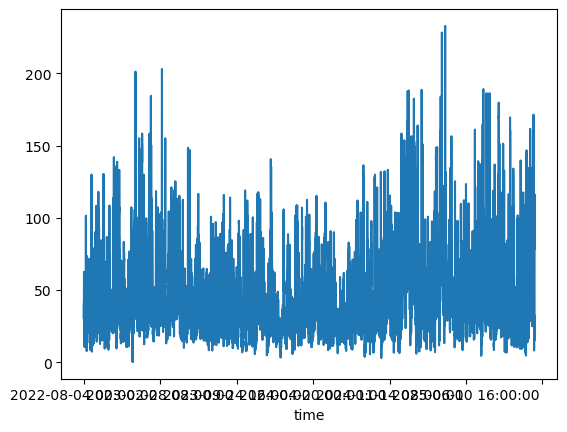

In [31]:
aqi_df["pm2_5"].plot()

In [32]:
print(fit.summary())

                                 ETS Results                                  
Dep. Variable:                  pm2_5   No. Observations:                29497
Model:                      ETS(AAdA)   Log Likelihood              -92651.228
Date:                Mon, 22 Dec 2025   AIC                         185324.457
Time:                        00:39:20   BIC                         185415.669
Sample:                    08-04-2022   HQIC                        185353.747
                         - 12-15-2025   Scale                           31.318
Covariance Type:               approx                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.9978      0.011     87.645      0.000       0.976       1.020
smoothing_trend        0.7840      0.021     36.918      0.000       0.742       0.826
smoothing_seasonal  

In [33]:
prediction = fit.get_prediction(start="2025-10-10", end="2025-10-15")

In [34]:
df = prediction.summary_frame(alpha=0.05)

<Axes: >

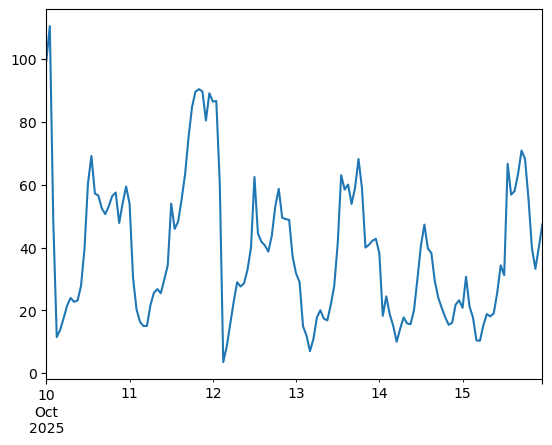

In [35]:
df["mean"].plot()

In [36]:
for col_name in aqi_df.columns:
    model = ETSModel(aqi_df[col_name], error="add", trend="add", seasonal="add", damped_trend=True, seasonal_periods=4)
    results = model.fit()
    results.save(f"models/ets/{col_name}.pickle")

c:\Users\trann\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\Users\trann\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\Users\trann\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\Users\trann\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\Users\trann\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self.

In [39]:
pm25_model = ETSResults.load("models/ets/pm10.pickle")
print(pm25_model.summary())

                                 ETS Results                                  
Dep. Variable:                   pm10   No. Observations:                29497
Model:                      ETS(AAdA)   Log Likelihood              -98875.848
Date:                Mon, 22 Dec 2025   AIC                         197773.696
Time:                        00:41:31   BIC                         197864.909
Sample:                    08-04-2022   HQIC                        197802.986
                         - 12-15-2025   Scale                           47.763
Covariance Type:               approx                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.9979      0.011     88.103      0.000       0.976       1.020
smoothing_trend        0.7758      0.021     36.785      0.000       0.735       0.817
smoothing_seasonal  

<Axes: >

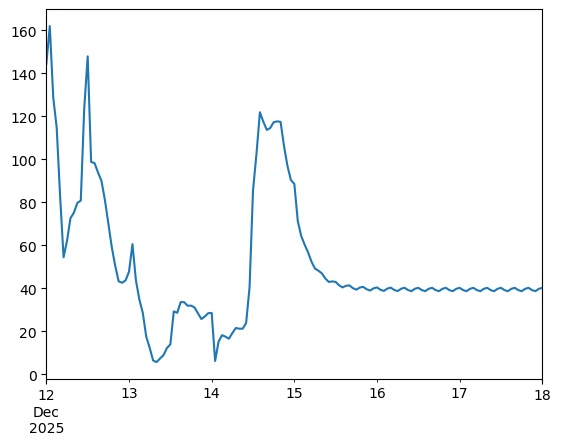

In [47]:
prediction = pm25_model.get_prediction(start="2025-12-12", end="2025-12-18")
df = prediction.summary_frame(alpha=0.05)
df["mean"].plot()